 ## ANÁLISE DE DADOS

  Sempre é importante analisar os dados que serão utilizadosantes de começarpensarem em qual algoritmo usar, gastar um bom tempo analisando os dados vai garantir uma melhor acurácia ao seu modelo.

## O Problema Envolvendo este DATASET

 Você está prestando serviço para uma corretora de imóveis, e ela dados de centenas de casas que foram colocadas a venda, entretanto é inviável tentar validar todas as casas em pouco tempo, então seu trabalho consiste em fazer previsões(regressão) para conseguir estimar o preço médio das casas, com base em seus atriutos, para assim direcionar a equipede avaliação de casas da melho forma possível para cada cliente.

# Importando as bibliotecas



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
#Preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
#Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Baixando, carregando e printando a base de dados

In [ ]:
ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
PATH = os.path.join("datasets", "housing")
URL = ROOT + "datasets/housing/housing.tgz"

def DownloadAndLoad(URL=URL, housing_path=PATH):
    os.makedirs(PATH, exist_ok=True)
    tgz_path = os.path.join(PATH, "housing.tgz")
    urllib.request.urlretrieve(URL, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=PATH)
    housing_tgz.close()
    csv_path = os.path.join(PATH, "housing.csv")
    return pd.read_csv(csv_path)

df = DownloadAndLoad()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Obtendo Informações da Base de Dados

Vale a pena ressaltar que existem 20640 linhas e 10 colunas, onde apeas a coluna "ocean_proximity" não tem valores float, e existem valores faltantes na  coluna "total_bedrooms".

Sempre antes de começar uma análise de dados, é bom utlizar alfumas funções do prórpio pandas para conhecar mais destes dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


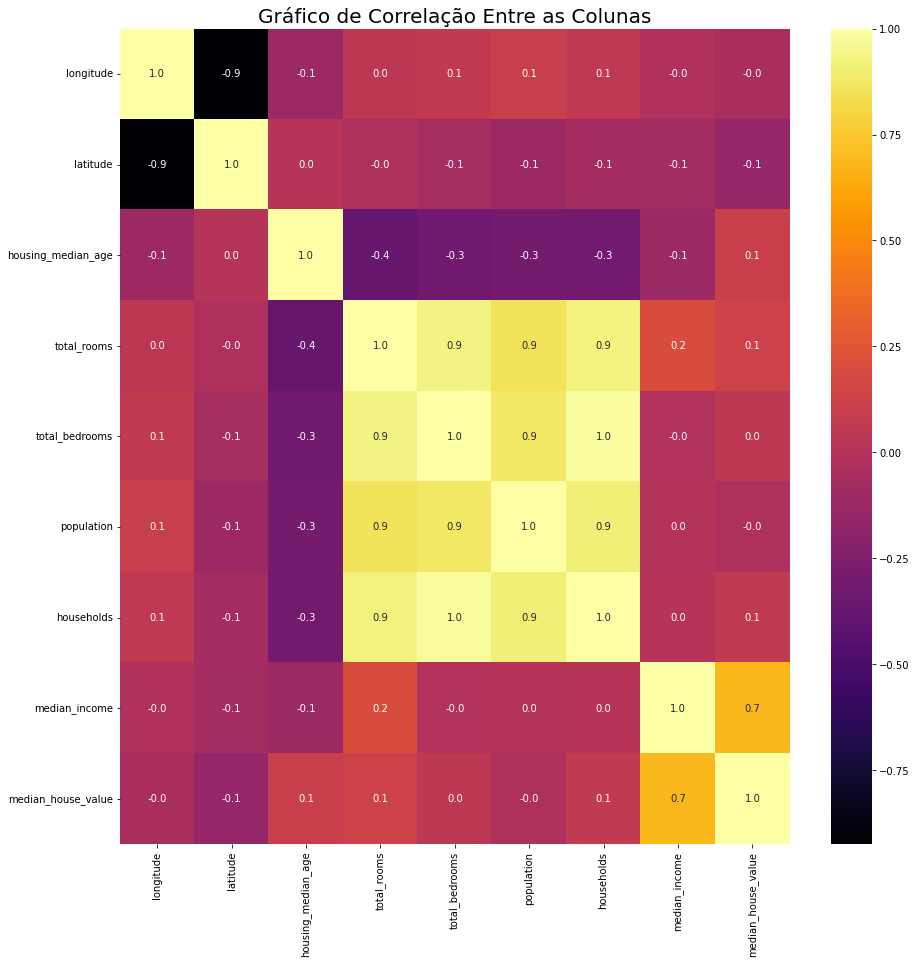

In [ ]:
corr= df.corr()
plt.figure(figsize=(15, 15))
plt.title('Gráfico de Correlação Entre as Colunas', fontsize=20)
seaborn.heatmap(corr, annot = True, fmt = ".1f", cmap=plt.get_cmap("inferno"))

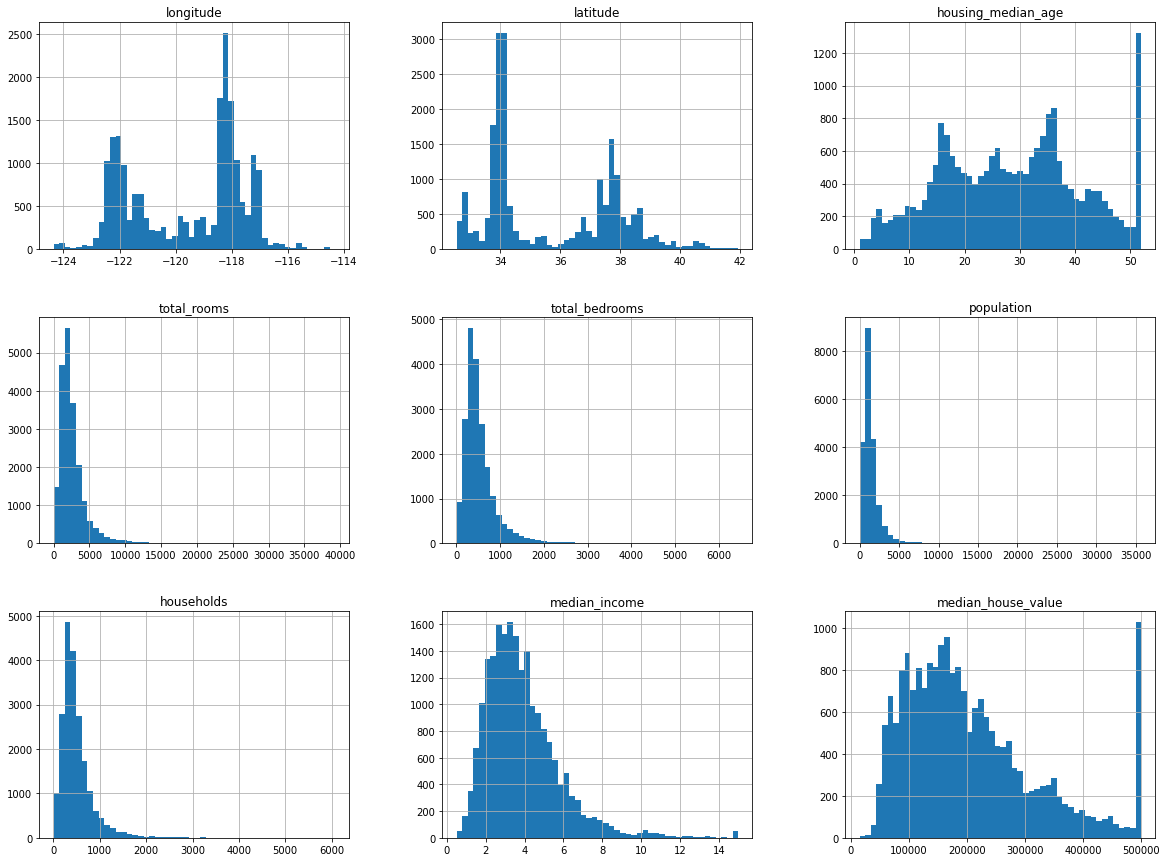

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Filtrando e Organizando os Dados


###Valores faltantes

O número de linhas com valores faltantes é baixo, próximo de 1% dos dados, existem varias fórmas de contornar esta situuação.
Os valores serão trocados pela mediana


*   Remover estas linhas
*   Substituir pela Média(Sucessível a Outlayers)
*   Substituir pela Média Aparada(5%)
*   Substituir pela Móda
*   Substituir pela Mediana
*   Substituir Pelo Desvio Absoluto Médio
*   Substituir Pelo Desvio Absoluto Mediano
*   Analisar Casas Similiares as casas faltas e utlizar quais madias descritas acima, isto pode levar trabalho, entretanto dependo da base de dados e da precisão a requerida, vale o tempo gasto




In [ ]:
X_df = df.drop(['median_house_value', 'ocean_proximity'], axis=1).copy()
y_df = df['median_house_value'].copy()

In [ ]:
NA = X_df['total_bedrooms'].isna().sum()
NA_porcentagem = NA * 100 / df.shape[0] 

median = X_df["total_bedrooms"].median()
X_df["total_bedrooms"].fillna(median, inplace=True) 

print(f'''
    Número de Linhas NA        = {NA}
    Porcentagem de Linhas NA   = {NA_porcentagem:.5f}%
    Numero de NA após retirada = {df['total_bedrooms'].isna().sum()}

''')


    Número de Linhas NA        = 207
    Porcentagem de Linhas NA   = 1.00291%
    Numero de NA após retirada = 207




### Colunas Categóricas

Na coluna df["ocean_proximity"] os dados utilizados são strings comentando o quão perto cada casa está do oceano, é necessário utilizar outro médo de representar estes dados para podermos usar está coluna no algoritmo de machine learning.

É normal imaginar inicialmente utilizar méodos de Apoio a Decisão de Multicritério (como AHP) ou funções do proprio SKlearn (como OrdinalEncoder) para organizar as categorias enumeradas, está é uma boa estratégia, entretanto depende da base de dados, para a nossa em especifico a melhor alternativa seria criar mais 5 colunas, e nelas entrarão valores 1 ou 0, para cada classe que cada linha pertence, como mostrado na variável ocean.

In [ ]:
df["ocean_proximity"].value_counts().index.tolist()

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [ ]:
ocean = pd.get_dummies(df["ocean_proximity"])
ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
X_df = pd.concat([X_df, ocean], axis=1)
X_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
X_array = X_df.to_numpy()
y_array = y_df.values.reshape(-1, 1)

print(f'''
X_array.shape = {X_array.shape}
type(X_array) = {type(X_array)}
X_array[0]    = {X_array[0]}

y_array.shape = {y_array.shape}
type(y_array) = {type(y_array)}
y_array[0]    = {y_array[0]}
''')


X_array.shape = (20640, 13)
type(X_array) = <class 'numpy.ndarray'>
X_array[0]    = [-122.23     37.88     41.      880.      129.      322.      126.
    8.3252    0.        0.        0.        1.        0.    ]

y_array.shape = (20640, 1)
type(y_array) = <class 'numpy.ndarray'>
y_array[0]    = [452600.]



### Normalização

Muitos algoritmos de aprendizzado de máquina são mais rapidos usando dados normalizados, vamos usar o StandardScaler no nossa DataFrame para deixa-lo em valores entre -1 e 1.

In [ ]:
std_X = StandardScaler().fit(X_array)
std_y = StandardScaler().fit(y_array)

X_norm = std_X.transform(X_array)
y_norm = std_y.transform(y_array)

print(f'''
X_norm.shape = {X_norm.shape}
type(X_norm) = {type(X_norm)}
X_norm[0]    = {X_norm[0]}

y_norm.shape = {y_norm.shape}
type(y_norm) = {type(y_norm)}
y_norm[0]    = {y_norm[0]}
''')


X_norm.shape = (20640, 13)
type(X_norm) = <class 'numpy.ndarray'>
X_norm[0]    = [-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97032521 -0.9744286
 -0.97703285  2.34476576 -0.89115574 -0.68188905 -0.01556621  2.83074203
 -0.38446649]

y_norm.shape = (20640, 1)
type(y_norm) = <class 'numpy.ndarray'>
y_norm[0]    = [2.12963148]



## Pepilines e Column Transform

Todo esse processo foi trabalhoso e dificíl de fazer, todos os processos tem que acontecer em uma ordem específica, por isso existe os pipelines!!!
Os pepilites são uma sequencias de transformações, com um estimiador no final, durante as etapas de organização da base de dados, varias etapas temde ser executadas na ordem correta, e os pepilines ajudam a autmatizar isto!
Todas as transformações usadas a acima com datframes poderiam ser colocadas em um pipein.

### Pipeline

pipe = Pipeline( 
  
  [ ("transformação1", transformação1( )),
  
   ("transformação1", transformação1( )),
  
  ...
  
  ("modelo", modelo( )) ] )

  pepiline.fit(df)

  pipeline.score()



### Make_Pipeline

pipe = make_pipeline(transformacao_1( ), 

transformacao_2( ), 

 ... , 

transformacao_n( ),  
modelo( ) ) 

pipe.fit(X_train, y_train) 

pipe.score(X_test, y_test)

### Pipeline com Column Transform

t = [ ('nome_transformador1', transformador_numerico, colunas_numericas),

('nome_transformador2', transformador_categorico, colunas_categoricas) ]

transformer = ColumnTransformer(transformers=t)

pipe = Pipeline( 
  
  [ ("transformações", transformer( )),
  
  ("modelo", modelo( )) ] )

pipe.fit(df)

pipe.score()


# Exercícios

## 1 - Experimente um regressor do Support Vector Machine (`sklearn.svm.SVR`), com vários hiperparâmetros como `kernel="linear"` (com vários valores para o hiperparâmetro `C`) ou `kernel="rbf"` ( com vários valores para os hiperparâmetros `C` e `gamma`). Não se preocupe com o que esses hiperparâmetros significam por enquanto. Como funciona o melhor preditor `SVR`?

## GridSearchCV
O GridSearchCV é uma função que testa diversos parametros dentro de um modelo, seguindo um dicionário, o SVR é um classificador da biblioteca Suporte a Vetorização de Máquina

## SVR Regressor
Em gerel é recomendado utilizar o LinearSVR ínves de SVR(kernel='linear') pelo otmizador utilizado neles terem desempenhos diferentes(Lembrando que os SVR se baseiam em um problema de otmização de Pesquisa Operacional).

kernel="poly" utiliza um vetor polynomial, um dos parâmetros que acompanha esse kernel é o grau utilizado para criacão dos vetores (semelhante a regressão polinomial)

kernel="linear" utilizado uma reta para criar o vetor da regressão (obs: este método tem uma complexidade computacional proporcional as polinomio)

kernel="rbf" é semelhante a usar um vetor polinomial, entretanto seguindo uma função, ele determina como irá arredondar a curva(obs: este método tem uma complexidade computacional alta)

gamma regula o quão estreito será o vetor (quanto maior mais estreito)

C regula o tamanho da rua (espaço entre os vetores que separam as classes), e quanto ele será sucetícel a outlayers(quanto maior, menor será a rua)

In [ ]:
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

X = df.drop(['median_house_value'], axis=1).copy()
y = df['median_house_value'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

pipe_SVR = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler()),
                     ('modelo', SVR() )])

parametros = [ {'modelo__kernel': ['linear'], 'modelo__C': [0.1, 1, 10, 100]},
               {'modelo__kernel': ['rbf'], 'modelo__C': [0.1, 1, 10, 100]},
               {'modelo__gamma': [0.1, 1, 10]} ]



SVR_GSCV = GridSearchCV(estimator=pipe_SVR, 
                           param_grid=parametros, 
                           scoring="neg_mean_absolute_error", 
                           verbose=3)

SVR_GSCV.fit(X_train, y_test.ravel())

NameError: ignored

In [ ]:
SVR_GSCV_MAE = -SVR_GSCV.best_score_
SVR_GSCV_Best = SVR_GSCV.best_params_

print(f""""
MAE = {SVR_GSCV_MAE}
Melhor Modelo SVR = {SVR_GSCV_Best}
""")

"
MAE = 49181.71101497855
Melhor Modelo SVR = {'modelo__C': 100, 'modelo__kernel': 'linear'}



## 2.

Question: Tente trocar `GridSearchCV` por `RandomizedSearchCV`.

##RandomizedSearchCV

Este algoritmo usa uma função para encontrar os melhores parametros dentro de uma sequencia de possíveis números, mas sem necessáriamente testar todos,
isso pode demorar algumas horas. 
Deixei ele rodando por 2 horas e ainda não efetuou todos os testes, então peguei o melhor score dele, uma outra alternativa seria diminuir o cv para 3 e definir u.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


parametros = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(0.1, 100),
        'gamma': expon(scale=1.0),
    }

SVR_RSCV = RandomizedSearchCV(SVR(), param_distributions=parametros,
                                n_iter=50, cv=5, scoring='neg_mean_absolute_error',
                                verbose=3)
SVR_RSCV.fit(X_treino, y_treino)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=30.9171554003901, gamma=0.4714056398682433, kernel=rbf;, score=-90290.172 total time=  26.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=30.9171554003901, gamma=0.4714056398682433, kernel=rbf;, score=-87141.212 total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=30.9171554003901, gamma=0.4714056398682433, kernel=rbf;, score=-88948.809 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=30.9171554003901, gamma=0.4714056398682433, kernel=rbf;, score=-87602.450 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=30.9171554003901, gamma=0.4714056398682433, kernel=rbf;, score=-89022.931 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1.4764059882467562, gamma=0.3888944700330668, kernel=rbf;, score=-90290.727 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1.4764059882467562, gamma=0.3888944700330668, kernel=rbf;, score=-87141.162 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1.4764059882467562, gamma=0.3888944700330668, kernel=rbf;, score=-88948.809 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1.4764059882467562, gamma=0.3888944700330668, kernel=rbf;, score=-87602.351 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1.4764059882467562, gamma=0.3888944700330668, kernel=rbf;, score=-89022.944 total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=4.517823535296521, gamma=0.7507671913248839, kernel=rbf;, score=-90290.670 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=4.517823535296521, gamma=0.7507671913248839, kernel=rbf;, score=-87141.167 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=4.517823535296521, gamma=0.7507671913248839, kernel=rbf;, score=-88948.809 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=4.517823535296521, gamma=0.7507671913248839, kernel=rbf;, score=-87602.361 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=4.517823535296521, gamma=0.7507671913248839, kernel=rbf;, score=-89022.943 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.5300653209538958, gamma=0.7608140604632393, kernel=rbf;, score=-90290.745 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.5300653209538958, gamma=0.7608140604632393, kernel=rbf;, score=-87141.161 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.5300653209538958, gamma=0.7608140604632393, kernel=rbf;, score=-88948.809 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.5300653209538958, gamma=0.7608140604632393, kernel=rbf;, score=-87602.348 total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.5300653209538958, gamma=0.7608140604632393, kernel=rbf;, score=-89022.944 total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=17.223396710955484, gamma=1.9217587067025033, kernel=linear;, score=-50555.991 total time=10.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=17.223396710955484, gamma=1.9217587067025033, kernel=linear;, score=-49157.128 total time= 9.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=17.223396710955484, gamma=1.9217587067025033, kernel=linear;, score=-49017.467 total time=10.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=17.223396710955484, gamma=1.9217587067025033, kernel=linear;, score=-49118.092 total time= 8.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=17.223396710955484, gamma=1.9217587067025033, kernel=linear;, score=-50117.654 total time=17.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.4223356697844312, gamma=0.0749921634657836, kernel=rbf;, score=-90290.747 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.4223356697844312, gamma=0.0749921634657836, kernel=rbf;, score=-87141.160 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.4223356697844312, gamma=0.0749921634657836, kernel=rbf;, score=-88948.809 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.4223356697844312, gamma=0.0749921634657836, kernel=rbf;, score=-87602.348 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.4223356697844312, gamma=0.0749921634657836, kernel=rbf;, score=-89022.944 total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=72.42265663511401, gamma=1.5439752662929302, kernel=linear;, score=-49413.073 total time=38.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=72.42265663511401, gamma=1.5439752662929302, kernel=linear;, score=-48165.287 total time=33.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=72.42265663511401, gamma=1.5439752662929302, kernel=linear;, score=-47719.453 total time=31.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
SVR_RSCV_MAE = 47719.453  #-SVR_GSCV.best_score_
SVR_RSCV_Best = SVR(C=72.42265663511401, gamma=1.5439752662929302, kernel='linear') #SVR_GSCV.best_params_

print(f""""
MAE = {SVR_RSCV_MAE}
Melhor Modelo = {SVR_RSCV_Best}
""")

"
MAE = 47719.453
Melhor Modelo SVR = SVR(C=72.42265663511401, gamma=1.5439752662929302, kernel='linear')



# 3.
Tente adicionar um transformador no pipeline de preparação para selecionar apenas os atributos mais importantes.



# Criando ransformadores

No sklearn é possível criar sus próprios tranformadore, criando uma classe que recebe BaseEstimator e TransformerMixin, com as funções init, fit e transform.



class nome_classe(BaseEstimator, TransformerMixin):

  def __init__(self, array):

  def fit()

  def transform()

In [ ]:
class MelhoresParametros(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, n):
        self.feature_importances = feature_importances
        self.n = n
    def fit(self, X, y=None): # retornas os indices das n melhores features do array
        self.feature_indices_ =  np.argsort( -np.absolute(self.feature_importances) )[:self.n]
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
X_pipe = df.drop('median_house_value', axis=1)
y_pipe = df['median_house_value'].values.reshape(-1, 1).copy()
X_pipe_treino, X_pipe_teste, y_pipe_treino, y_pipe_teste = train_test_split(X_pipe, y_pipe, random_state=42, test_size=0.2)

t = [ ('SimpleImputer', SimpleImputer(strategy="median"), ['total_bedrooms']),
      ('onehot', OneHotEncoder(), ['ocean_proximity'])]

preprocessador = ColumnTransformer(transformers=t, remainder='passthrough')

regressor = LinearRegression()


pipe = Pipeline(steps=[("preprocessor", preprocessador),
                       ("scale", StandardScaler()),
                       ("modelo", regressor)])

pipe.fit(X_pipe_treino, y_pipe_treino.ravel())
print(f"Classificador: {regressor}")
print(f"MAE: {mean_absolute_error(pipe.predict(X_pipe_teste), y_pipe_teste.ravel())}")
print("-"*100, end="\n\n")

In [ ]:
RegLinear_coefs = pipe.named_steps['modelo'].coef_.flatten()
RegLinear_coefs

In [ ]:
base_columns = df.drop(['median_house_value', 'ocean_proximity'], axis=1).columns.to_numpy() 
oneHot = pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names()
columns_features = np.append(base_columns, oneHot)

columns_features

In [ ]:
colors = ['g' if e >= 0 else 'r' for e in RegLinear_coefs]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(columns_features, RegLinear_coefs, color=colors, edgecolor='black')
ax.set_xticklabels(columns_features, rotation = 45)
ax.set_title('Rendimento no Preço das Casas por Coluna', fontsize=20)
plt.show()

# 4.

Tente criar um único pipeline que faça a preparação completa dos dados e a previsão final.

In [ ]:
regressor = LinearRegression()

for c in range(5, 14):
  pipe = Pipeline(steps=[("preprocessor", preprocessador),
                        ("scale", StandardScaler()),
                        ("best_features", MelhoresParametros(RegLinear_coefs, c)),
                        ("modelo", regressor)])
  print(f"Com as {c} melhores features")
  pipe.fit(X_pipe_treino, y_pipe_treino.ravel())
  print(f"Classificador: {regressor}")
  print(f"MAE: {mean_absolute_error(pipe.predict(X_pipe_teste), y_pipe_teste.ravel())}")
  print("-"*100, end="\n\n")